In [1]:
import numpy as np
from package.utils import compute_Uk, V_mea
from package.CaRTeD_demo import CaRTeD

In [2]:
np.random.seed(1) 

data = np.load('data_eg.npz', allow_pickle=True)
X_list = data['X'].tolist()
Sk_g = data['S'].tolist()
V_g = data['V']
Uk_g= data['U_ground'].tolist()
W_g = data['W_1']
A_g = data['A_1']

In [3]:
p = 1
Rank = 4

Uk, Sk, V, W, A_list = CD_par(X_list, Rank, p) 

In [4]:
US = [None] * len(X_list)
US_g = [None] * len(X_list)

for k in range(len(X_list)):
    US[k] = Uk[k] @ Sk[k]
    US_g[k] = Uk_g[k] @ Sk_g[k]


UK_sim = compute_Uk(US, US_g)

print('RR:', UK_sim)

Uk_sim2 = compute_Uk(Uk, Uk_g)

print('CPI:',Uk_sim2)

RR: 0.9697546286009824
CPI: 0.7710447247686144


In [5]:
print(Sk_g[0])
print(Sk[0])

[[8.81841421 0.         0.         0.        ]
 [0.         6.21833187 0.         0.        ]
 [0.         0.         5.9711148  0.        ]
 [0.         0.         0.         7.86228479]]
[[6.14970659 0.         0.         0.        ]
 [0.         6.09068915 0.         0.        ]
 [0.         0.         8.10388279 0.        ]
 [0.         0.         0.         6.42107015]]


In [6]:
V[np.abs(V) < 3] = 0
print(V)
print(V_g)

V_sim = V_mea(V, V_g)
print(f"SIM: {V_sim:.4f}")

[[7.8068729  0.         0.         0.        ]
 [8.79017431 0.         0.         0.        ]
 [6.94153074 0.         0.         0.        ]
 [0.         7.62299455 0.         0.        ]
 [0.         6.97729788 0.         0.        ]
 [0.         7.98527128 0.         0.        ]
 [0.         0.         8.17338796 0.        ]
 [0.         0.         6.65449308 0.        ]
 [0.         0.         7.02050477 0.        ]
 [0.         0.         0.         6.5491628 ]
 [0.         0.         0.         6.17769103]
 [0.         0.         0.         4.21936423]]
[[7.65775687 0.         0.         0.        ]
 [8.62227662 0.         0.         0.        ]
 [6.80894328 0.         0.         0.        ]
 [0.         7.16850586 0.         0.        ]
 [0.         6.56130611 0.         0.        ]
 [0.         7.50918338 0.         0.        ]
 [0.         0.         9.33154579 0.        ]
 [0.         0.         7.5974256  0.        ]
 [0.         0.         8.01530064 0.        ]
 [0.        

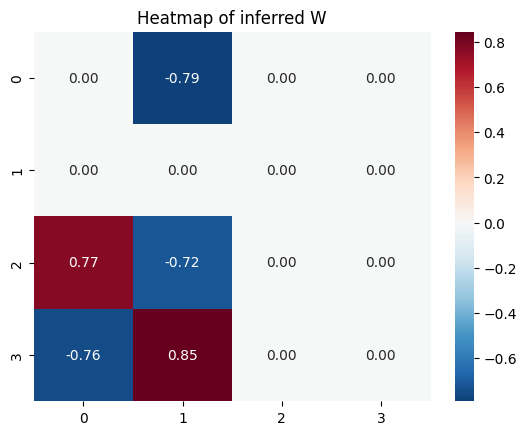

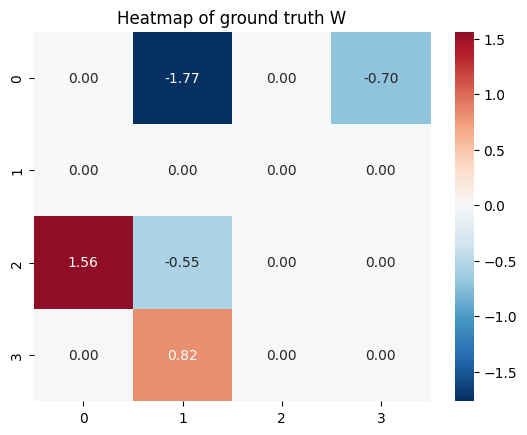

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure()
sns.heatmap(W, cmap='RdBu_r', center=0, annot=True, fmt=".2f", cbar=True)
plt.title("Heatmap of inferred W")
plt.show()

# Plot heatmap for the second matrix
plt.figure()
sns.heatmap(W_g, cmap='RdBu_r', center=0, annot=True, fmt=".2f", cbar=True)
plt.title("Heatmap of ground truth W")
plt.show()

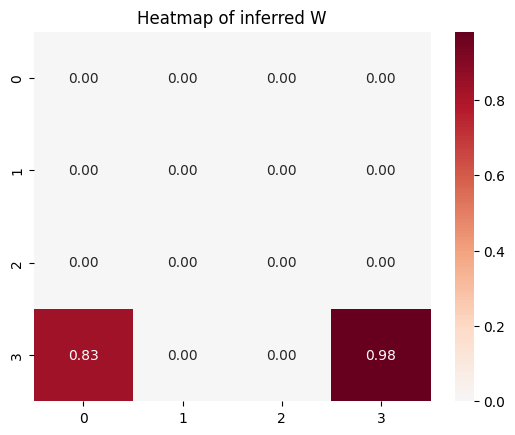

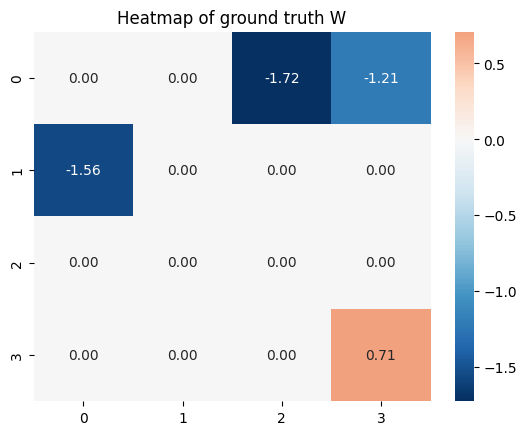

In [9]:
A_list[np.abs(A_list)<0.7] = 0

plt.figure()
sns.heatmap(A_list, cmap='RdBu_r', center=0, annot=True, fmt=".2f", cbar=True)
plt.title("Heatmap of inferred W")
plt.show()

# Plot heatmap for the second matrix
plt.figure()
sns.heatmap(A_g, cmap='RdBu_r', center=0, annot=True, fmt=".2f", cbar=True)
plt.title("Heatmap of ground truth W")
plt.show()